# Тестовое задание на анализ данных.
**Елизавета Рыжова**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
!chcp 1251

Текущая кодовая страница: 1251


Предположим, что архив находится в рабочей директории.

In [3]:
if not "exmpl" in os.listdir():
    !wsl unzip -q exmpl.zip -d ./exmpl

Поскольку данные имеют ошибки с длинной строк и форматом, будем загружать данные по строчкам.\
Сложим все данные в один Датафрейм.\
Сделаем индексацию по 'datetime' извлечённой из полей с датами и временем.

In [4]:
def read_file(path):
    with open(path, 'r', encoding='latin1') as file:
        lines = file.readlines()
    
    counter = 0
    rows = []
    for line in lines[3:]:  # skip the header and empty rows
        row = line.strip().split(' ')
        if len(row) == 15:
            rows.append(row)
        else:
            counter += 1
    name = path.split('/')[-1]
    print(f'Файл {name} \nПотеряно строк {counter}')
    df = pd.DataFrame(rows, columns=['Date', 'Time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'])

    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    return df

In [5]:
file_names = os.listdir('./exmpl')

dfs = []

for file_name in file_names:
    df = read_file('./exmpl/' + file_name)
    df.info()
    display(df.head(3))
    dfs.append(df)

logs_df = pd.concat(dfs)
logs_df.set_index('datetime', inplace=True)

Файл u_ex200328.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608910 entries, 0 to 2608909
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Date             object        
 1   Time             object        
 2   s-ip             object        
 3   cs-method        object        
 4   cs-uri-stem      object        
 5   cs-uri-query     object        
 6   s-port           object        
 7   cs-username      object        
 8   c-ip             object        
 9   cs(User-Agent)   object        
 10  cs(Referer)      object        
 11  sc-status        object        
 12  sc-substatus     object        
 13  sc-win32-status  object        
 14  time-taken       object        
 15  datetime         datetime64[ns]
dtypes: datetime64[ns](1), object(15)
memory usage: 318.5+ MB


,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,2020-03-28
1,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,2020-03-28
2,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,2020-03-28


Файл u_ex200723.log 
Потеряно строк 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129684 entries, 0 to 129683
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             129684 non-null  object        
 1   Time             129684 non-null  object        
 2   s-ip             129684 non-null  object        
 3   cs-method        129684 non-null  object        
 4   cs-uri-stem      129684 non-null  object        
 5   cs-uri-query     129684 non-null  object        
 6   s-port           129684 non-null  object        
 7   cs-username      129684 non-null  object        
 8   c-ip             129684 non-null  object        
 9   cs(User-Agent)   129684 non-null  object        
 10  cs(Referer)      129684 non-null  object        
 11  sc-status        129684 non-null  object        
 12  sc-substatus     129684 non-null  object        
 13  sc-win32-status  129684 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-23,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,2020-07-23 00:00:00
1,2020-07-23,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,50,2020-07-23 00:00:00
2,2020-07-23,00:00:05,192.168.254.71,POST,/1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,15,2020-07-23 00:00:05


Файл u_ex200724.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137997 entries, 0 to 137996
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             137997 non-null  object        
 1   Time             137997 non-null  object        
 2   s-ip             137997 non-null  object        
 3   cs-method        137997 non-null  object        
 4   cs-uri-stem      137997 non-null  object        
 5   cs-uri-query     137997 non-null  object        
 6   s-port           137997 non-null  object        
 7   cs-username      137997 non-null  object        
 8   c-ip             137997 non-null  object        
 9   cs(User-Agent)   137997 non-null  object        
 10  cs(Referer)      137997 non-null  object        
 11  sc-status        137997 non-null  object        
 12  sc-substatus     137997 non-null  object        
 13  sc-win32-status  137997 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-24,00:00:02,192.168.254.71,POST,/1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,31,2020-07-24 00:00:02
1,2020-07-24,00:00:02,192.168.254.71,POST,/1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,78,2020-07-24 00:00:02
2,2020-07-24,00:00:13,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,46,2020-07-24 00:00:13


Файл u_ex200725.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113430 entries, 0 to 113429
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             113430 non-null  object        
 1   Time             113430 non-null  object        
 2   s-ip             113430 non-null  object        
 3   cs-method        113430 non-null  object        
 4   cs-uri-stem      113430 non-null  object        
 5   cs-uri-query     113430 non-null  object        
 6   s-port           113430 non-null  object        
 7   cs-username      113430 non-null  object        
 8   c-ip             113430 non-null  object        
 9   cs(User-Agent)   113430 non-null  object        
 10  cs(Referer)      113430 non-null  object        
 11  sc-status        113430 non-null  object        
 12  sc-substatus     113430 non-null  object        
 13  sc-win32-status  113430 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-25,00:00:01,192.168.254.71,POST,/1c-ask-wms-obuhovo-test/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,408,0,0,48544,2020-07-25 00:00:01
1,2020-07-25,00:00:05,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,31,2020-07-25 00:00:05
2,2020-07-25,00:00:05,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,62,2020-07-25 00:00:05


Файл u_ex200726.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110520 entries, 0 to 110519
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             110520 non-null  object        
 1   Time             110520 non-null  object        
 2   s-ip             110520 non-null  object        
 3   cs-method        110520 non-null  object        
 4   cs-uri-stem      110520 non-null  object        
 5   cs-uri-query     110520 non-null  object        
 6   s-port           110520 non-null  object        
 7   cs-username      110520 non-null  object        
 8   c-ip             110520 non-null  object        
 9   cs(User-Agent)   110520 non-null  object        
 10  cs(Referer)      110520 non-null  object        
 11  sc-status        110520 non-null  object        
 12  sc-substatus     110520 non-null  object        
 13  sc-win32-status  110520 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-26,00:00:04,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,46,2020-07-26 00:00:04
1,2020-07-26,00:00:04,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,125,2020-07-26 00:00:04
2,2020-07-26,00:00:09,192.168.254.71,POST,/1c_askona_wms_2/ru_RU/e1cib/files/8759dcf0-a2...,cmd=putToTempStorage,80,-,192.168.10.61,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,http://1cweb.gw-ad.local/1c_askona_wms_2/ru_RU/,200,0,0,15,2020-07-26 00:00:09


Файл u_ex200727.log 
Потеряно строк 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120503 entries, 0 to 120502
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             120503 non-null  object        
 1   Time             120503 non-null  object        
 2   s-ip             120503 non-null  object        
 3   cs-method        120503 non-null  object        
 4   cs-uri-stem      120503 non-null  object        
 5   cs-uri-query     120503 non-null  object        
 6   s-port           120503 non-null  object        
 7   cs-username      120503 non-null  object        
 8   c-ip             120503 non-null  object        
 9   cs(User-Agent)   120503 non-null  object        
 10  cs(Referer)      120503 non-null  object        
 11  sc-status        120503 non-null  object        
 12  sc-substatus     120503 non-null  object        
 13  sc-win32-status  120503 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-27,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ru_RU/e1cib/modules/call,id=urn:module:md:2c20ff97-e5d5-4135-9a21-fcdcf...,80,-,192.168.10.61,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,http://1cweb.gw-ad.local/1c_askona_wms_2/ru_RU/,200,0,0,15,2020-07-27 00:00:00
1,2020-07-27,00:00:02,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,46,2020-07-27 00:00:02
2,2020-07-27,00:00:02,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,62,2020-07-27 00:00:02


Файл u_ex200728.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143514 entries, 0 to 143513
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             143514 non-null  object        
 1   Time             143514 non-null  object        
 2   s-ip             143514 non-null  object        
 3   cs-method        143514 non-null  object        
 4   cs-uri-stem      143514 non-null  object        
 5   cs-uri-query     143514 non-null  object        
 6   s-port           143514 non-null  object        
 7   cs-username      143514 non-null  object        
 8   c-ip             143514 non-null  object        
 9   cs(User-Agent)   143514 non-null  object        
 10  cs(Referer)      143514 non-null  object        
 11  sc-status        143514 non-null  object        
 12  sc-substatus     143514 non-null  object        
 13  sc-win32-status  143514 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,2020-07-28 00:00:00
1,2020-07-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,2020-07-28 00:00:00
2,2020-07-28,00:00:05,192.168.254.71,POST,/1c_askona_wms_msk-1/ws/galESBExchange.1cws,-,80,-,172.19.251.17,-,-,200,0,0,46,2020-07-28 00:00:05


Файл u_ex200729.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168197 entries, 0 to 168196
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             168197 non-null  object        
 1   Time             168197 non-null  object        
 2   s-ip             168197 non-null  object        
 3   cs-method        168197 non-null  object        
 4   cs-uri-stem      168197 non-null  object        
 5   cs-uri-query     168197 non-null  object        
 6   s-port           168197 non-null  object        
 7   cs-username      168197 non-null  object        
 8   c-ip             168197 non-null  object        
 9   cs(User-Agent)   168197 non-null  object        
 10  cs(Referer)      168197 non-null  object        
 11  sc-status        168197 non-null  object        
 12  sc-substatus     168197 non-null  object        
 13  sc-win32-status  168197 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-29,00:00:06,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,2020-07-29 00:00:06
1,2020-07-29,00:00:06,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,46,2020-07-29 00:00:06
2,2020-07-29,00:00:08,192.168.254.71,POST,/1c_askona_wms_2/ru_RU/e1cib/files/33cf3d4c-c1...,cmd=putToTempStorage,80,-,192.168.10.61,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,http://1cweb.gw-ad.local/1c_askona_wms_2/ru_RU/,200,0,0,15,2020-07-29 00:00:08


Файл u_ex200730.log 
Потеряно строк 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169459 entries, 0 to 169458
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             169459 non-null  object        
 1   Time             169459 non-null  object        
 2   s-ip             169459 non-null  object        
 3   cs-method        169459 non-null  object        
 4   cs-uri-stem      169459 non-null  object        
 5   cs-uri-query     169459 non-null  object        
 6   s-port           169459 non-null  object        
 7   cs-username      169459 non-null  object        
 8   c-ip             169459 non-null  object        
 9   cs(User-Agent)   169459 non-null  object        
 10  cs(Referer)      169459 non-null  object        
 11  sc-status        169459 non-null  object        
 12  sc-substatus     169459 non-null  object        
 13  sc-win32-status  169459 non-null  ob

,Date,Time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2020-07-30,00:00:01,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,2020-07-30 00:00:01
1,2020-07-30,00:00:01,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,46,2020-07-30 00:00:01
2,2020-07-30,00:00:06,192.168.254.71,POST,/1c_askona_wms_2/ru_RU/e1cib/files/33cf3d4c-c1...,cmd=putToTempStorage,80,-,192.168.10.61,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,http://1cweb.gw-ad.local/1c_askona_wms_2/ru_RU/,200,0,0,15,2020-07-30 00:00:06


Данные загружены и осмотрены.\
Изменим названия колонок и тип данных.

In [6]:
logs_df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

In [7]:
logs_df[['s_port', 'sc_status', 'time_taken']] = logs_df[['s_port', 'sc_status', 'time_taken']].astype(int)

In [8]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3702214 entries, 2020-03-28 00:00:00 to 2020-07-30 23:59:50
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Date             object
 1   Time             object
 2   s_ip             object
 3   cs_method        object
 4   cs_uri_stem      object
 5   cs_uri_query     object
 6   s_port           int32 
 7   cs_username      object
 8   c_ip             object
 9   cs(User_Agent)   object
 10  cs(Referer)      object
 11  sc_status        int32 
 12  sc_substatus     object
 13  sc_win32_status  object
 14  time_taken       int32 
dtypes: int32(3), object(12)
memory usage: 409.6+ MB


Представлены данные с 28 Марта 20го года по 30 Июля 20го года.

In [9]:
logs_df.s_ip.unique()

array(['192.168.254.71'], dtype=object)

s_ip во всех наблюдениях один и тот же.

In [10]:
logs_df.cs_uri_stem.unique()

array(['/1c_askona_wms_2/ws/galESBExchange.1cws',
       '/1c_askona_wms_msk-1/ws/galESBExchange.1cws',
       '/erp_pmt_repl_signer1/hs/dadir/getEmployees', ...,
       '/1c-ask-wms-obuhovo-test/ru_RU/e1csys/mngsrv/empty.gif',
       '/e1csys/mngsrv/favicon.ico', '/telephony-service.html'],
      dtype=object)

In [11]:
logs_df.c_ip.unique()

array(['192.168.10.61', '172.19.251.17', '192.168.254.40',
       '192.168.254.153', '192.168.253.5', '192.168.254.102',
       '192.168.254.127', '172.19.25.73', '192.168.254.110',
       '192.168.254.109', '192.168.254.105', '192.168.254.101',
       '192.168.254.108', '192.168.254.107', '192.168.254.104',
       '192.168.254.103', '172.19.180.132', '172.19.25.20',
       '192.168.254.100', '172.19.25.15', '192.168.254.120',
       '192.168.254.189', '172.19.25.71', '10.11.9.146', '172.19.180.135'],
      dtype=object)

In [12]:
logs_df.resample('D').size()  # Daily log count

datetime
2020-03-28    2608910
2020-03-29          0
2020-03-30          0
2020-03-31          0
2020-04-01          0
               ...   
2020-07-26     110520
2020-07-27     120503
2020-07-28     143514
2020-07-29     168197
2020-07-30     169459
Freq: D, Length: 125, dtype: int64

Данные не полные, есть отчёт только за 28 Марта и далее только 23-30 Июля. В Марте запросов на порядок больше.

In [13]:
logs_df.resample('M').size()  # Monthly log count

datetime
2020-03-31    2608910
2020-04-30          0
2020-05-31          0
2020-06-30          0
2020-07-31    1093304
Freq: M, dtype: int64

так же дисбаланс в пользу Марта.

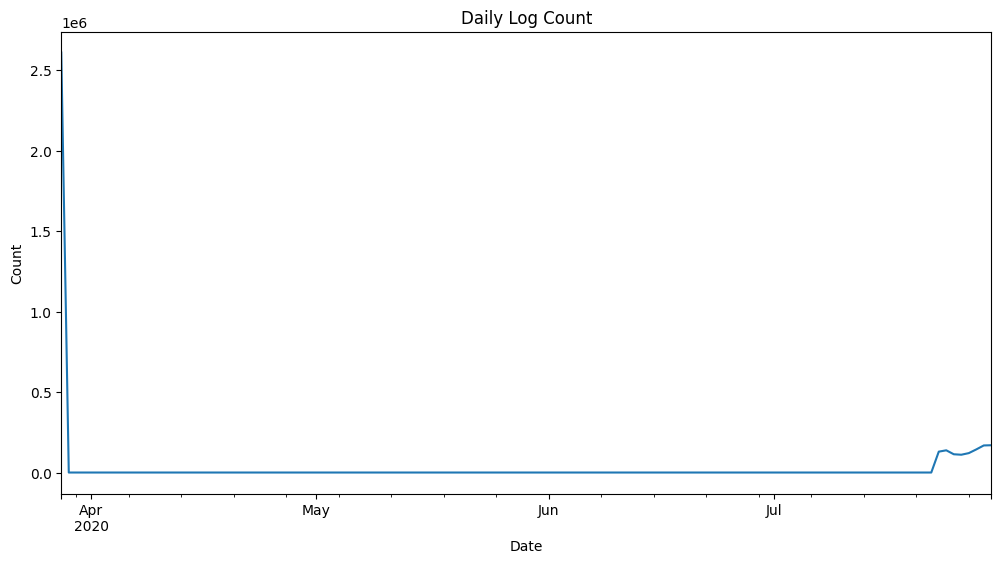

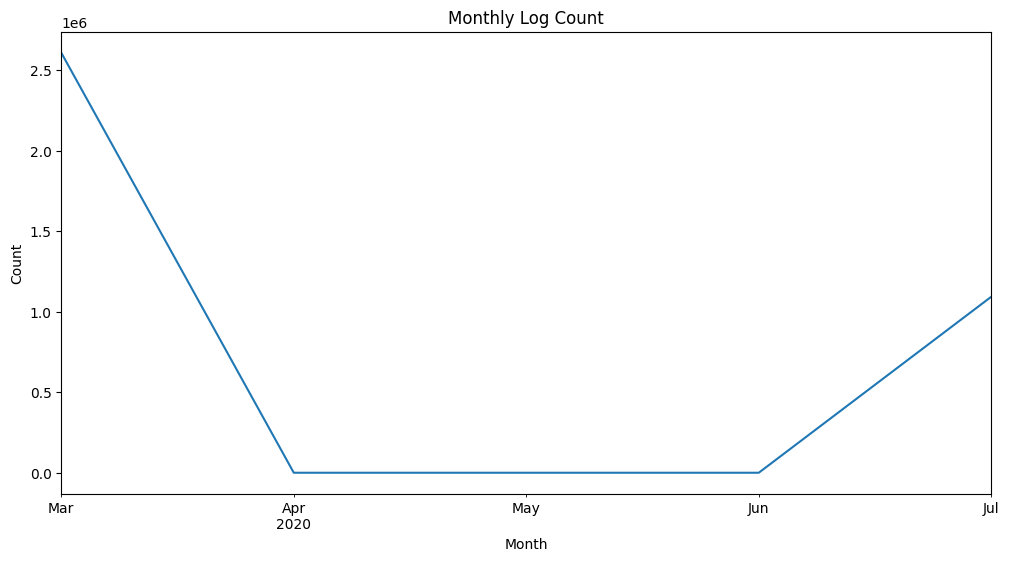

In [14]:
import matplotlib.pyplot as plt

logs_df.resample('D').size().plot(kind='line', figsize=(12, 6), title='Daily Log Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

logs_df.resample('M').size().plot(kind='line', figsize=(12, 6), title='Monthly Log Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Визуализация количества запросов.

In [15]:
from scipy.stats import zscore

logs_df['LogCountZScore'] = zscore(logs_df.resample('D').size())
anomalous_logs = logs_df[logs_df['LogCountZScore'].abs() > 3]  # 
anomalous_logs

,Date,Time,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status,time_taken,LogCountZScore
datetime,,,,,,,,,,,,,,,,
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,15,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,31,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,46,11.01833
2020-03-28,2020-03-28,00:00:00,192.168.254.71,POST,/1c_askona_wms_2/ws/galESBExchange.1cws,-,80,-,192.168.10.61,-,-,200,0,0,62,11.01833


Анализ аномалий показывает, что март отличается от остальных данных.

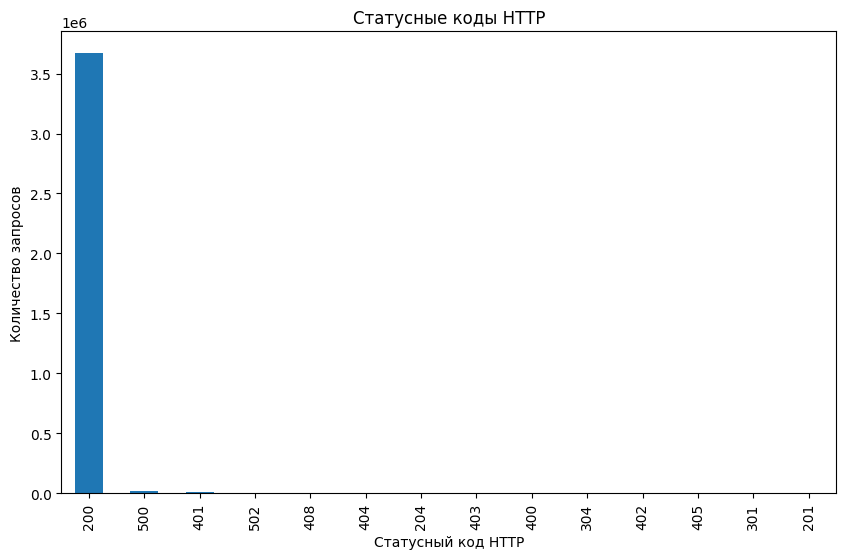

In [17]:
# Визуализируйте статусные коды HTTP
status_codes = logs_df.sc_status.value_counts()
status_codes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Статусный код HTTP')
plt.ylabel('Количество запросов')
plt.title('Статусные коды HTTP')
plt.show()

Статус запросов в основном успешный - код 200.